In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

In [5]:
eam495 = pd.read_table("/content/log.eam.4.95.thermo", sep=r"\s+")
morse50 = pd.read_table("/content/log.morse.5.0.thermo", sep=r"\s+")
morse55 = pd.read_table("/content/log.morse.5.5.thermo", sep=r"\s+")
morse60 = pd.read_csv("/content/log.morse.6.0.thermo", sep=r"\s+")
morse65 = pd.read_table("/content/log.morse.6.5.thermo", sep=r"\s+")
morse70 = pd.read_table("/content/log.morse.7.0.thermo", sep=r"\s+")
morse70.head()

,Step,Temp,Volume,v_atomic_volume,Density,PotEng,v_energy_peratom,Press
0,0,0.000000e+00,32768.000,8.192000,12.880933,-10320.347,-2.580087,1194394.9
1,1,2.253558e-27,32989.682,8.247421,12.794377,-10320.347,-2.580087,1186368.9
2,2,8.479718e-27,33212.362,8.303090,12.708594,-10482.781,-2.620695,1146013.9
3,3,2.434282e-26,33436.041,8.359010,12.623577,-10640.369,-2.660092,1106680.8
4,4,6.006869e-26,33660.723,8.415181,12.539316,-10793.204,-2.698301,1068345.0


# task 4

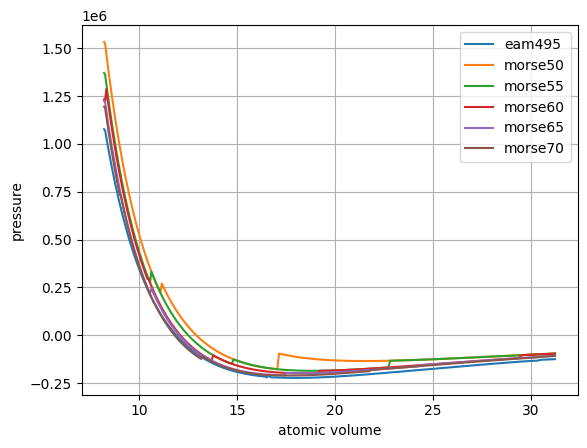

In [6]:
Data = [eam495, morse50, morse55, morse60, morse65, morse70]
Pot_names = ['eam495', 'morse50', 'morse55', 'morse60', 'morse65', 'morse70']

for i, pot in enumerate(Data):
    plt.plot(pot['v_atomic_volume'], pot['Press'], label=Pot_names[i])

plt.ylabel('pressure')
plt.xlabel('atomic volume')
plt.legend(loc='best')
plt.grid(True)
plt.show()


В гнуплоте так и не захотел строиться(

# task 5

In [5]:
Mins = [pot['v_atomic_volume'][np.where(pot['PotEng'] == min(pot['PotEng']))[0][0]] for pot in Data]
Mins

[11.90672, 11.075435, 10.543316, 12.120846, 12.049188, 11.76538]

 Равновесное состояние находится в минимуме энергии, берем соотв. объём для пересчета в плотность.

In [8]:
Dens = 63.546/np.array(Mins)/6.02214076/10**23 * 10**24
Dens

array([8.862274040426687, 9.527446602560465, 10.008294882049372,
       8.70571374000043, 8.757487688185236, 8.968738414112359],
      dtype=object)

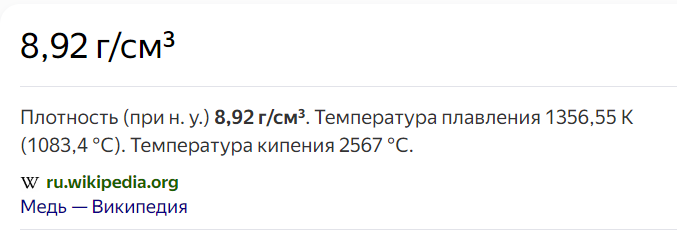

Больший радиус обрезания ближе к табличному значению

# task 6

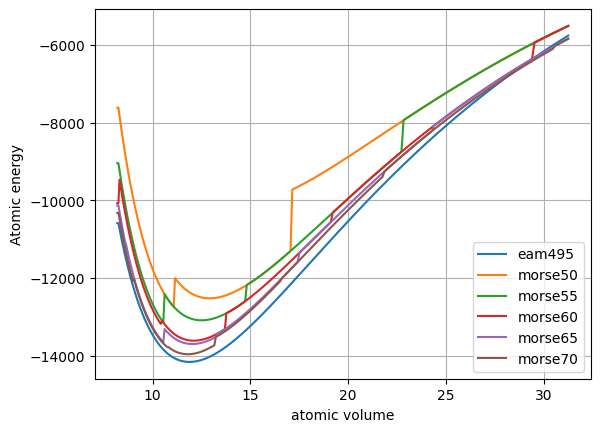

In [ ]:
for i, pot in enumerate(Data):
    plt.plot(pot['v_atomic_volume'], pot['PotEng'], label=Pot_names[i])

plt.ylabel('Atomic energy')
plt.xlabel('atomic volume')
plt.legend(loc='best')
plt.grid(True)
plt.show()

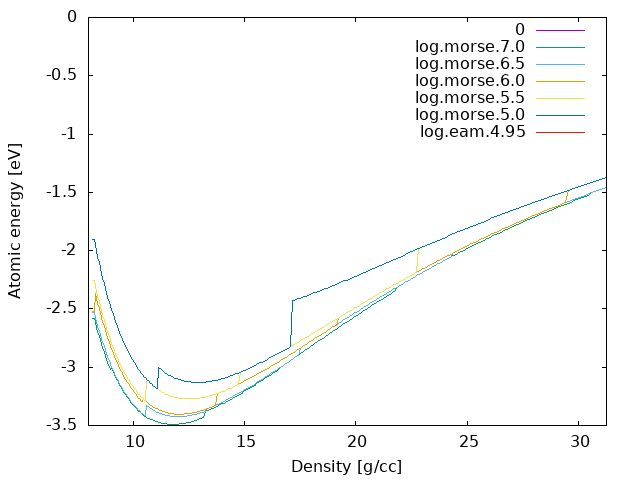

Энергию построил, но еам почему-то не видит

# q 1 Как связаны давление и энергия?

В минимуме энергии происходит смена знака давления, то есть силы отталкивания и притягивания скомпенсированы.

# q 2 Как определить равновесную плотность из графика энергии от объема?

 Равновесное состояние находится в минимуме энергии, берем соотв. объём для пересчета в плотность.

# q 3 Чему равны параметры $D_0$, $r_0$ и $\alpha$ в потенциале Морзе для меди

Эти параметры можно посмотреть в input файле.

$D_0 = 0.35279$, $r_0 = 2.82542$ и $\alpha = 1.40717$

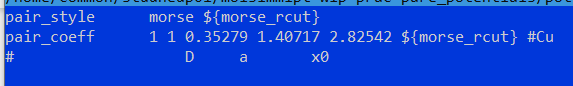

# q 4 Почему на графиках есть скачки при некоторых значениях объема?


Потому что в радиус обрезки попадает еще один атом, и вклад в потенциальную энергию, вносимый этим атомом, привносит скачок на графике

# q 5 Почему этих скачков нет с EAM потенциалом?

Потому что еам сглаживается от $r_{cut}$ до 0

# q 6

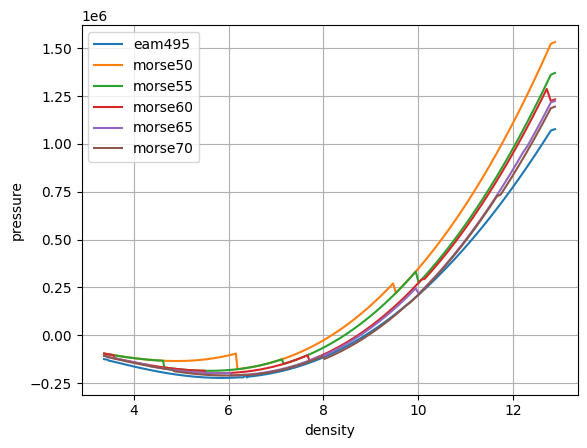

In [7]:
for i, pot in enumerate(Data):
    plt.plot(pot['Density'], pot['Press'], label=Pot_names[i])

plt.ylabel('pressure')
plt.xlabel('density')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Чтобы реализовать это в скрипте, нужно изменить параметр u 4:8 на u 5:8